In [2]:
#Sentiment Analysis of tweet mentions of Dell using NLTK in python 
#We have to predict the sentiment of fiancial news using nltk
#About Dataset
#This dataset contains 1csv file(24970,9)
#Columns Provided in the Dataset
#Unnamed,Datetime,Tweet,Text,Username,sentiment,sentiment_score,emotion,emotion_score
#What is NLTK ?
#The Natural Language Toolkit (NLTK) is a platform used for building Python programs that
#work with human language data for applying in statistical natural language processing (NLP).
#It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.
#What is sentiment analysis ?
#Sentiment analysis is the process of detecting positive or negative sentiment in text.
#It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

In [167]:
#Import required libraries
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#import dataset
tweets_df = pd.read_csv("/kaggle/input/sentiment-and-emotions-of-tweets/sentiment-emotion-labelled_Dell_tweets.csv")

In [18]:
tweets_df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [216]:
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'])

In [219]:
tweets_df['Date'] = tweets_df['Datetime'].dt.date
tweets_df['time'] = tweets_df['Datetime'].dt.time
tweets_df['Date'].value_counts()

2022-04-29    1032
2022-06-22     271
2022-04-26     260
2022-01-03     258
2022-02-11     227
              ... 
2022-07-17      34
2022-04-02      32
2022-04-16      29
2022-02-20      28
2022-01-02      27
Name: Date, Length: 273, dtype: int64

In [220]:
tweets_df['time'].value_counts()

16:30:00    11
15:18:01     7
18:00:01     7
15:00:03     6
18:00:02     6
            ..
09:23:11     1
09:37:18     1
09:41:27     1
09:43:53     1
01:31:30     1
Name: time, Length: 21214, dtype: int64

In [218]:
tweets_df['sentiment'] = tweets_df['sentiment'].astype('category')
tweets_df['emotion	'] = tweets_df['emotion'].astype('category')

In [20]:
#Drop first column
tweets_df.drop(columns=tweets_df.columns[0],axis =1,inplace=True)
tweets_df.head()

,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [21]:
tweets_df.shape #to know the entire data rown and columns numbers 

(24970, 8)

In [187]:
tweets_df.info() #From above info there is no missing/null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24970 entries, 0 to 24969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24970 non-null  int64  
 1   Datetime         24970 non-null  object 
 2   Tweet Id         24970 non-null  int64  
 3   Text             24970 non-null  object 
 4   Username         24970 non-null  object 
 5   sentiment        24970 non-null  object 
 6   sentiment_score  24970 non-null  float64
 7   emotion          24970 non-null  object 
 8   emotion_score    24970 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.7+ MB


In [194]:
sentiments = tweets_df.groupby("sentiment")['sentiment_score'].mean().reset_index(name='score')
sentiments

,sentiment,score
0,negative,0.817646
1,neutral,0.692020
2,positive,0.818972


In [196]:
sentimentcount = tweets_df['sentiment'].value_counts().reset_index(name='counts')
sentimentcount

,index,counts
0,negative,10556
1,positive,7366
2,neutral,7048


<Axes: title={'center': 'Count of Sentiments'}>

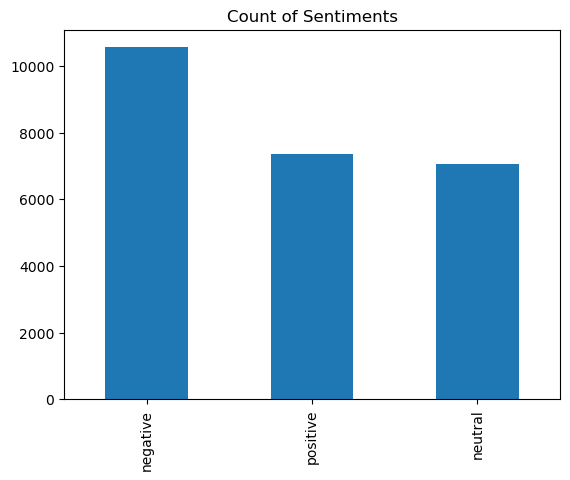

In [186]:
#Analysing anf Visualise of distribution of sentiments and emotion
#Step1-counting the sentiments
tweets_df.sentiment.value_counts().plot(kind='bar', title ='Count of Sentiments')

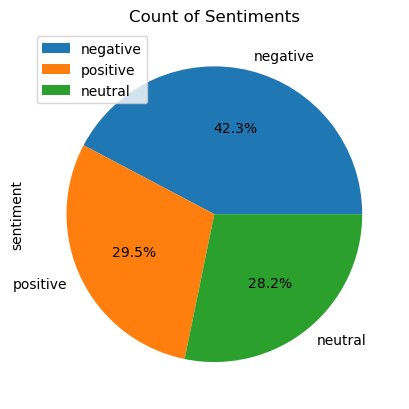

In [197]:
tweets_df.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', title ='Count of Sentiments')
plt.legend()

In [199]:
#Step2-Counting the emotions out of sentiments 
tweets_df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [208]:
emotions= tweets_df.groupby("emotion")['emotion_score'].mean().reset_index(name='score')
emotion

,emotion,score
0,anger,0.940512
1,anticipation,0.608328
2,disgust,0.738406
3,fear,0.831716
4,joy,0.888341
5,optimism,0.835059
6,sadness,0.790417
7,surprise,0.678751


In [209]:
emotion  = tweets_df['emotion'].value_counts().reset_index(name='count')
emotion

,index,count
0,anger,7520
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


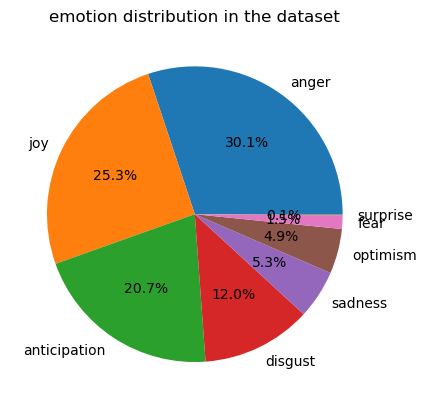

In [210]:
plt.pie(emotion['count'],labels=emotion['index'],autopct='%1.1f%%')
plt.title("emotion distribution in the dataset")
plt.show()

<Axes: title={'center': 'Count of Emotions'}>

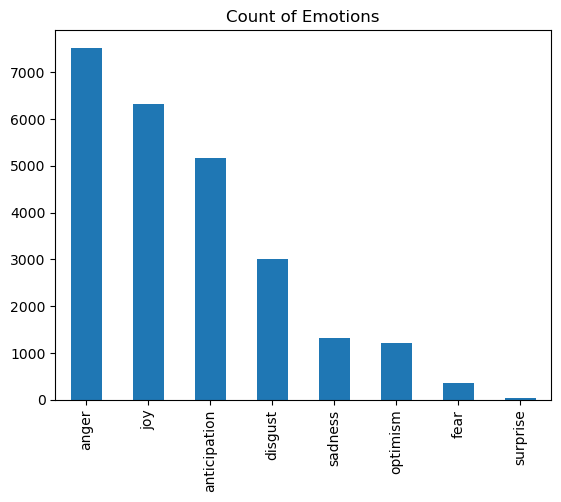

In [211]:
#Step2-Counting the emotions out of sentiments 
tweets_df['emotion'].value_counts().plot(kind='bar', title ='Count of Emotions')

In [221]:
time_emotion = tweets_df.groupby(["time","emotion"])["emotion_score"].mean().reset_index(name="emotion_score")
time_emotion

,time,emotion,emotion_score
0,00:00:00,anticipation,0.826022
1,00:00:00,joy,0.975232
2,00:00:01,anger,0.943849
3,00:00:01,anticipation,0.842750
4,00:00:01,optimism,0.943664
...,...,...,...
23951,23:59:35,sadness,0.507180
23952,23:59:37,anger,0.913499
23953,23:59:38,fear,0.982363
23954,23:59:52,anticipation,0.740764


In [223]:
time_emotion = tweets_df.pivot_table(values="emotion_score",index="Date",columns="emotion",aggfunc='mean')

In [224]:
time_emotion = time_emotion.fillna(method='ffill')

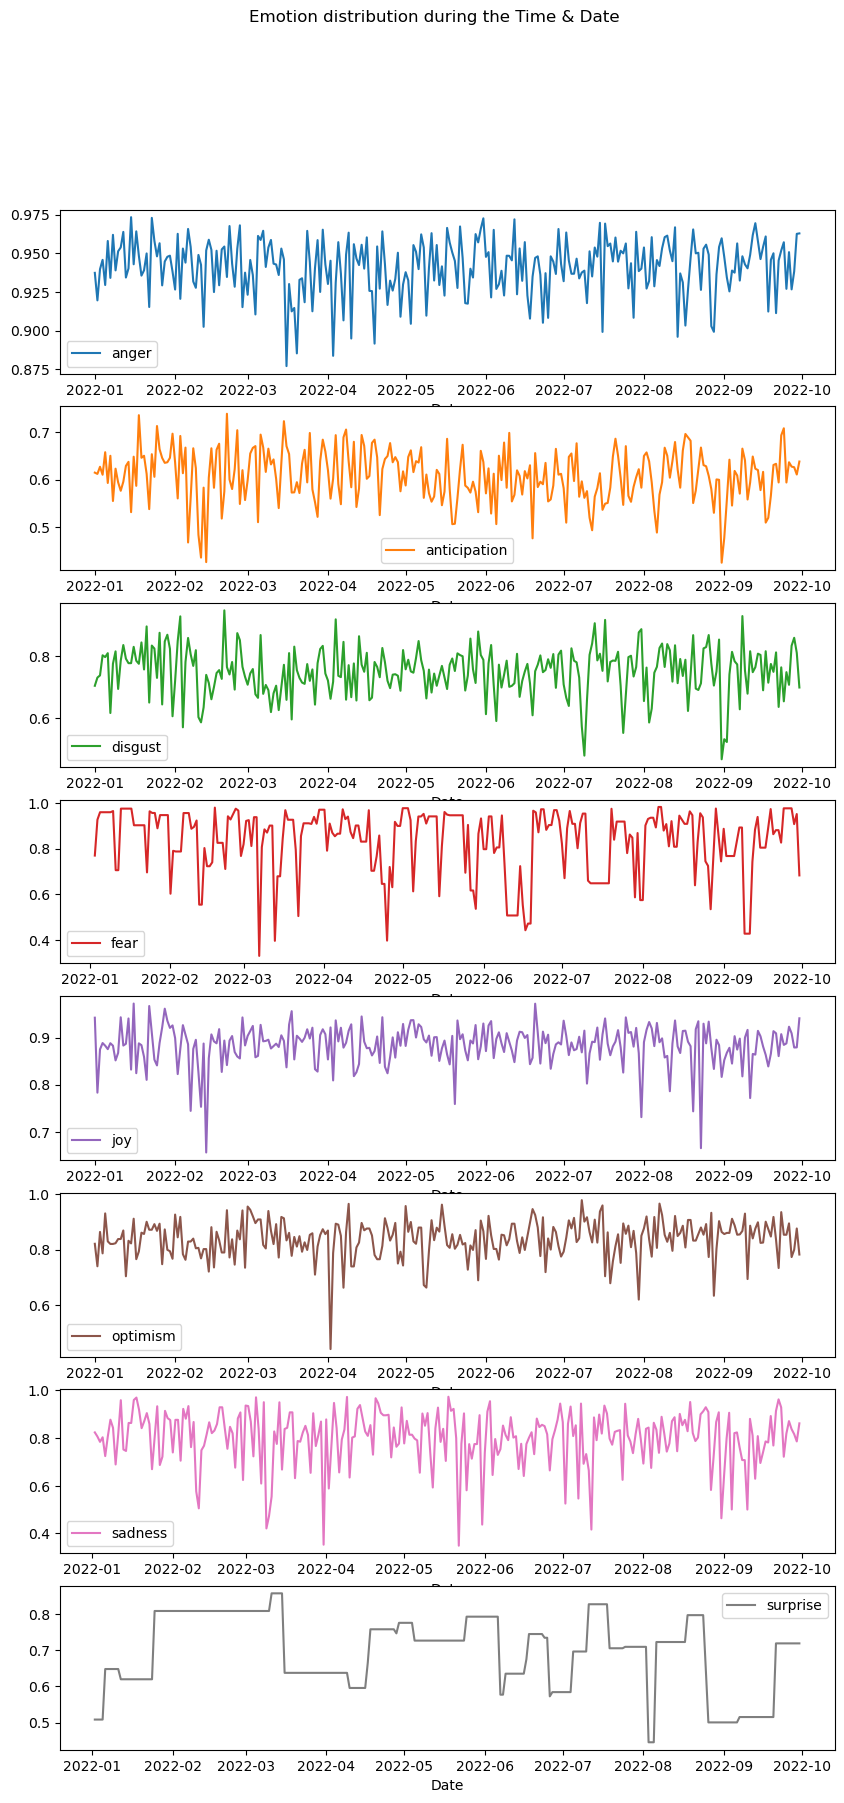

In [231]:
time_emotion.plot(subplots=True,layout=(8,1),
                  figsize=(10,20),
                  title="Emotion distribution during the Time & Date",
                  sharey=False,sharex=False)

plt.show()

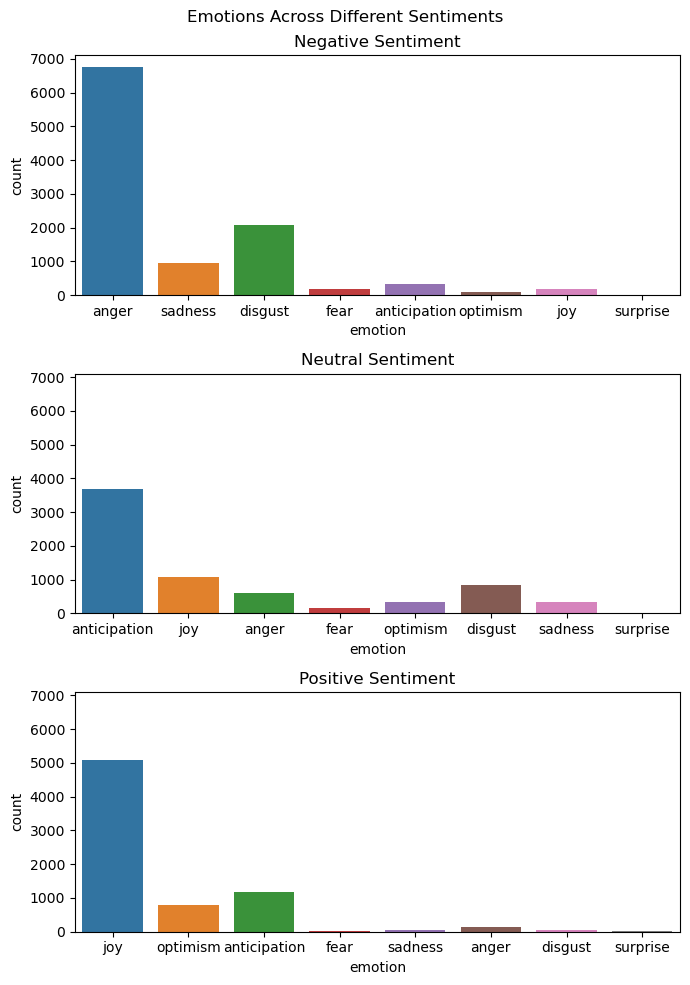

In [28]:
#Step-3 Visualise emotions for different sentiments of tweets
#Lets see how the emotions look for tweets which are labelled as positive,Negative,Neutral statement.

fig, axes = plt.subplots(3,1, figsize = (7,10), sharey = True)
plt.suptitle('Emotions Across Different Sentiments')
sns.countplot(data=tweets_df.loc[tweets_df.sentiment == 'negative'], x= 'emotion', ax= axes[0])
axes[0]. title. set_text("Negative Sentiment")
sns.countplot(data=tweets_df.loc[tweets_df.sentiment == 'neutral'], x= 'emotion', ax= axes[1])
axes[1]. title. set_text("Neutral Sentiment")
sns.countplot(data=tweets_df.loc[tweets_df.sentiment == 'positive'], x= 'emotion', ax= axes[2])
axes[2]. title. set_text("Positive Sentiment")
plt.tight_layout()

In [29]:
#Examine sentiments and emotions across financial qurters (Q1 to Q3)
#Step-1 Breaking dataframe(df) into three quaters 
Q1_tweets = tweets_df.loc[tweets_df.Datetime < '2022-04-01']
Q2_tweets = tweets_df.loc[tweets_df.Datetime < '2022-07-01']
Q3_tweets = tweets_df.loc[tweets_df.Datetime >= '2022-07-01']

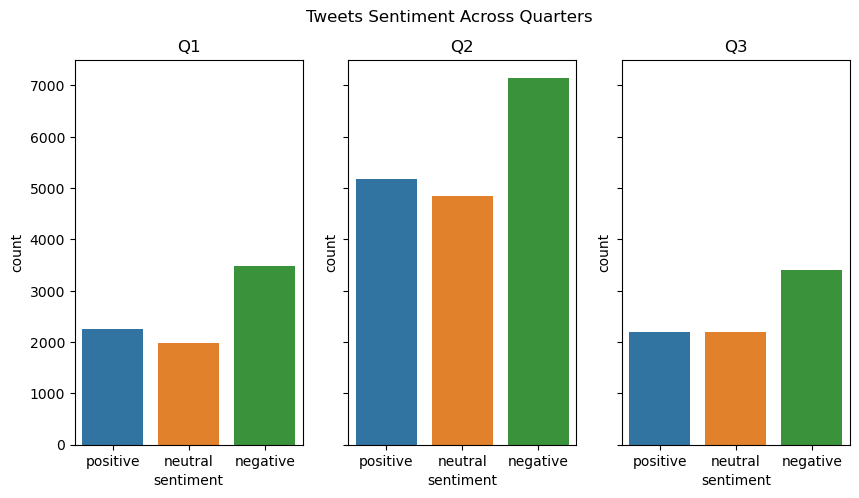

In [30]:
fig, axes = plt.subplots(1,3, figsize = (10,5), sharey = True)
plt.suptitle("Tweets Sentiment Across Quarters")
sns.countplot(data=Q1_tweets, x='sentiment', ax=axes[0], order=['positive', 'neutral', 'negative'])
axes[0]. title. set_text("Q1")
sns.countplot(data=Q2_tweets, x='sentiment', ax=axes[1], order=['positive', 'neutral', 'negative'])
axes[1]. title. set_text("Q2")
sns.countplot(data=Q3_tweets, x='sentiment', ax=axes[2], order=['positive', 'neutral', 'negative'])
axes[2]. title. set_text("Q3")

In [31]:
#[1.Negative Tweets are higher across all the quarters]
#[2.Total number of tweets spiked during the second quarter]

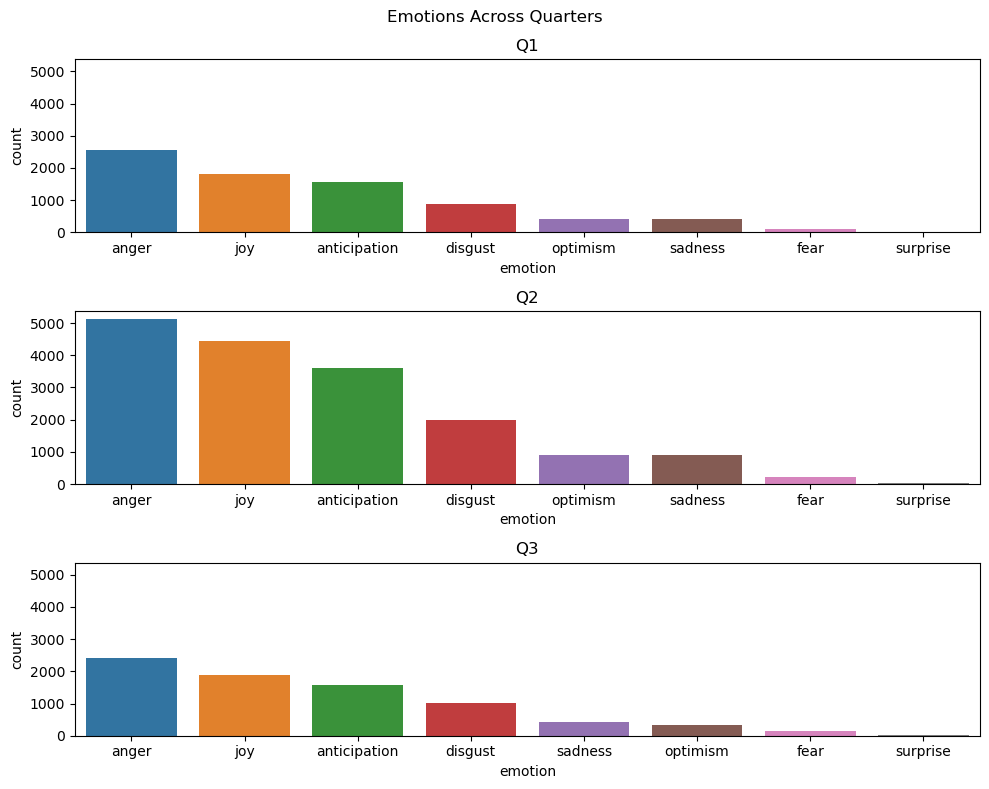

In [32]:
#Visualise emotions across quarters 

fig, axes = plt.subplots(3,1, figsize = (10,8), sharey = True)
plt.suptitle("Emotions Across Quarters")
sns.countplot(data=Q1_tweets, x='emotion', ax=axes[0], order=Q1_tweets['emotion'].value_counts().index)
axes[0]. title. set_text("Q1")
sns.countplot(data=Q2_tweets, x='emotion', ax=axes[1], order=Q2_tweets['emotion'].value_counts().index )
axes[1]. title. set_text("Q2")
sns.countplot(data=Q3_tweets, x='emotion', ax=axes[2], order=Q3_tweets['emotion'].value_counts().index)
axes[2]. title. set_text("Q3")
plt.tight_layout()

In [157]:
#As expected: 'anger' dominates the show, as most of the tweets show negative sentiment. So here is a human behavioral lesson:

#People respond more to negative stimuli, thats called negative bias.

#For example: How often you read or say "My laptop's fan has got too noisy", but we hardly mention it when it is working as it should. Got my point!

In [158]:
from wordcloud import WordCloud, STOPWORDS
import cv2

In [162]:
mask_file = cv2.imread("/kaggle/input/twitter-logo/6-2-twitter-png-image.png")

In [163]:
text =  ''.join(tweets_df.Text)

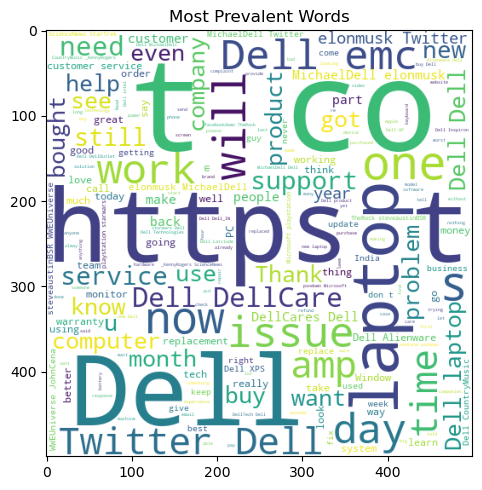

In [166]:
stopwords = set(STOPWORDS)
word_cloud = WordCloud(background_color = 'white', 
                       stopwords = stopwords, 
                       mask = mask_file,
                       max_words = 200).generate(text)


plt.figure(figsize = (5, 5))
plt.imshow(word_cloud)
plt.axis("on")
plt.title('Most Prevalent Words')
plt.tight_layout()
plt.show()